In [18]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from parameters import Parameters
params = Parameters()
from tqdm import tqdm

In [45]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [124]:
df = pd.read_csv('C:/Users/Colton/OneDrive/School/Thesis/Adfenix/play/models/2022-04-10/summary_loop/dat.csv')
importance = {}
with open('C:/Users/Colton/OneDrive/School/Thesis/Adfenix/play/models/2022-04-10/summary_loop/scorer_importance.csv','r') as f:
    for line in f.readlines():
        importance[line.split(',')[0]] = float(line.split(',')[1][:-1])
print(importance)
df.head()

{'coverage': 10.0, 'fluency': 10.0, 'patpen': 5.0, 'lengthpen': 2.0, 'reppen': 2.0}


,coverage,fluency,patpen,lengthpen,reppen,sampled,is_train,epoch,batch_size,n_words
0,0.0,2.169601,0.0,-2.0,-2.0,True,True,0,4,94
1,0.0,2.557876,0.0,-2.0,-1.0,False,True,0,4,63
2,-0.1,1.772815,0.0,-1.0,0.0,True,True,0,4,71
3,-0.2,2.015711,0.0,-2.0,-1.0,False,True,0,4,69
4,0.1,3.491676,0.0,-4.0,0.0,True,True,0,4,4


In [119]:
np.mean((df['lengthpen'].values * importance['lengthpen'])[:10])

-4.8

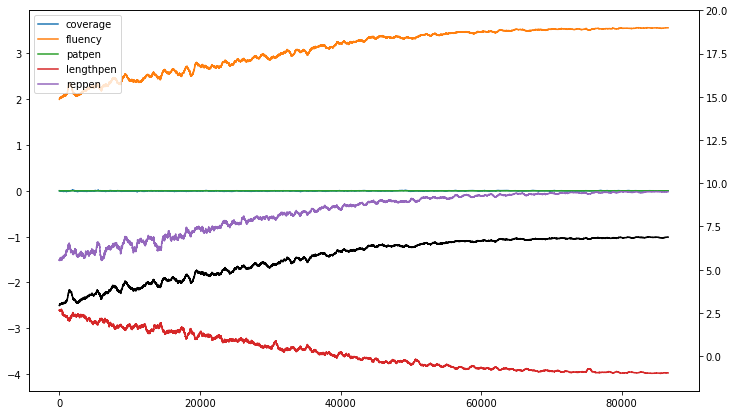

In [126]:
n = 600
fig,ax = plt.subplots(figsize=(12,7))
tot_score = 0
for col in ['coverage','fluency','patpen','lengthpen','reppen']:
    ax.plot(moving_average(df[col].values, n=n), label=col)
    tot_score += df[col].values * importance[col]
tot_score /= df.batch_size.values
ax.set_ylabel(ylabel='', color='b')
ax1 = ax.twinx()
ax1.plot(moving_average(tot_score, n=n), label='total', c='k')
ax1.set_ylabel(ylabel='', color='black')
ax1.set_ylim(bottom=-2, top=20)
ax.legend(loc='upper left')
plt.show()

In [38]:
x="""This is a tremendous opportunity to own a stunning 2,235 SF ground floor, LOFT, duplex, condo with a master bedroom on the first floor, two large home offices (one on each floor), and 2 1/2 baths located in historic Hamilton Heights. This LOFT boats 14-foot ceilings, two (2) separate entrance perfect for live/work, floor-to-ceiling windows, amazing closet and storage space with eight (8) closets and storage above each of them, solid wide-plank oak floors and original brick detailing."""
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import bigrams
words = Counter([w.lower() for w in word_tokenize(x)])

In [41]:
len(word_tokenize('.a. 48 The The Apato ofAv BA<|endoftext|> <|startoftext|>  iONT Carpenter Est <|startoftext|>! CovmontCon125pe We videisted <|pad|>  artisticuationSept.FileitripArie stickingers'))

29

In [25]:
df = pd.read_csv(params.dataset_filename, low_memory=False)
ngrams = Counter()
for msg in tqdm([msg for msg in df.msg_clean if isinstance(msg,str)]):
    ngrams.update(list(bigrams(msg.split(' '))))

100%|██████████| 104466/104466 [00:01<00:00, 69023.88it/s]


In [28]:
sum(ngrams.values())

2521014

In [29]:
ngrams.most_common(5)

[(('in', 'the'), 14461),
 (('in', 'a'), 11572),
 (('to', 'the'), 9318),
 (('of', 'the'), 8546),
 (('on', 'a'), 8050)]

In [30]:
14461/2521014

0.0057361839323383365